In [2]:
import os
import glob
import matplotlib
import matplotlib.pyplot as plt

from wavespectra import read_ww3

%matplotlib inline

Wavespectra is an open source project for processing ocean wave spectral data. The library is built on top of xarray and provides reading and writing of different spectral data formats, calculation of common integrated wave paramaters, spectral partitioning and spectral manipulation in a package focussed on speed and efficiency for large numbers of spectra.

# Reading spectra from files
Several methods are provided to read various file formats including spectral models like WW3, SWAN, WWM and observation instruments such as TRIAXYS and SPOTTER.

In [3]:
dset = read_ww3("/wave/socean/spec20120101T00_spec.nc", chunks={"site": 1})
dset.attrs = {}
dset

<xarray.Dataset>
Dimensions:  (dir: 24, freq: 25, site: 14048, time: 249)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T03:00:00 ... 2012-02-01
  * site     (site) float64 1.0 2.0 3.0 4.0 ... 1.405e+04 1.405e+04 1.405e+04
  * freq     (freq) float32 0.04118 0.045298003 ... 0.36873826 0.40561208
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
Data variables:
    lon      (site) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    lat      (site) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    efth     (time, site, freq, dir) float32 dask.array<chunksize=(249, 1, 25, 24), meta=np.ndarray>
    dpt      (time, site) float32 dask.array<chunksize=(249, 1), meta=np.ndarray>
    wspd     (time, site) float32 dask.array<chunksize=(249, 1), meta=np.ndarray>
    wdir     (time, site) float32 dask.array<chunksize=(249, 1), meta=np.ndarray>

# spec namespace

Wavespectra defines a new namespace accessor called `spec` which is attached to xarray's objects. This namespace provides access to wavespectra main objects `SpecDset` and `SpecArray` which extend functionality from `Dataset` and `DataArray` respectively.

In [21]:
dset.efth.spec

<SpecArray 'efth' (time: 249, site: 14048, freq: 25, dir: 24)>
dask.array<SpecArray shape=(249, 14048, 25, 24), dtype=float32, chunksize=(249, 1, 25, 24), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T03:00:00 ... 2012-02-01
  * site     (site) float64 1.0 2.0 3.0 4.0 ... 1.405e+04 1.405e+04 1.405e+04
  * freq     (freq) float32 0.04118 0.045298003 ... 0.36873826 0.40561208
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
Attributes:
    standard_name:   sea_surface_wave_directional_variance_spectral_density
    units:           m^{2}.s.degree^{-1}
    _units:          m2 s rad-1
    _variable_name:  efth

In [22]:
dset.spec

<SpecDataset>
Dimensions:  (dir: 24, freq: 25, site: 14048, time: 249)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T03:00:00 ... 2012-02-01
  * site     (site) float64 1.0 2.0 3.0 4.0 ... 1.405e+04 1.405e+04 1.405e+04
  * freq     (freq) float32 0.04118 0.045298003 ... 0.36873826 0.40561208
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
Data variables:
    lon      (site) float32 dask.array<SpecDataset>
    lat      (site) float32 dask.array<SpecDataset>
    efth     (time, site, freq, dir) float32 dask.array<SpecDataset>
    dpt      (time, site) float32 dask.array<SpecDataset>
    wspd     (time, site) float32 dask.array<SpecDataset>
    wdir     (time, site) float32 dask.array<SpecDataset>

# SpecArray
## Spectral wave parameters.

In [5]:
dset.efth.spec.hs()


<xarray.DataArray 'hs' (time: 249, site: 14048)>
dask.array<mul, shape=(249, 14048), dtype=float64, chunksize=(249, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T03:00:00 ... 2012-02-01
  * site     (site) float64 1.0 2.0 3.0 4.0 ... 1.405e+04 1.405e+04 1.405e+04
Attributes:
    standard_name:  sea_surface_wave_significant_height
    units:          m

In [6]:
ds = dset.isel(time=range(0,5), site=2000)
ds.efth.spec.stats(["hs", "hmax", "tp", "tm01", "tm02", "dpm", "dm", "dspr", "swe"]).load()


<xarray.Dataset>
Dimensions:  (time: 5)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-01-01T12:00:00
    site     float64 2.001e+03
Data variables:
    hs       (time) float64 1.209 1.207 1.19 1.175 1.149
    hmax     (time) float64 2.322 2.315 2.282 2.25 2.198
    tp       (time) float64 9.217 9.478 9.87 9.825 9.662
    tm01     (time) float64 7.212 7.291 7.384 7.503 7.671
    tm02     (time) float64 6.767 6.843 6.932 7.032 7.198
    dpm      (time) float64 294.3 293.1 295.4 296.6 295.6
    dm       (time) float32 306.37106 304.95337 303.72302 302.44507 301.18774
    dspr     (time) float64 44.86 43.53 42.56 41.82 40.94
    swe      (time) float64 0.666 0.6654 0.661 0.6644 0.6584

## Partitioning
### Frequency split

In [7]:
part = ds.efth.spec.split(fmin=0.05, fmax=0.1)
print(part, "\n")
print(part.freq)

<xarray.DataArray 'efth' (time: 5, freq: 9, dir: 24)>
dask.array<concatenate, shape=(5, 9, 24), dtype=float32, chunksize=(5, 7, 24), chunktype=numpy.ndarray>
Coordinates:
    site     float64 2.001e+03
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-01-01T12:00:00
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
  * freq     (freq) float64 0.05 0.05481 0.06029 0.06632 ... 0.08827 0.0971 0.1 

<xarray.DataArray 'freq' (freq: 9)>
array([0.05    , 0.054811, 0.060292, 0.066321, 0.072953, 0.080248, 0.088273,
       0.0971  , 0.1     ])
Coordinates:
    site     float64 2.001e+03
  * freq     (freq) float64 0.05 0.05481 0.06029 0.06632 ... 0.08827 0.0971 0.1
Attributes:
    standard_name:  sea_surface_wave_frequency
    units:          Hz


### Watershed

In [8]:
ds.efth.spec.partition(ds.wspd, ds.wdir, ds.dpt, max_swells=3)

<xarray.DataArray 'efth' (part: 4, time: 5, freq: 25, dir: 24)>
dask.array<concatenate, shape=(4, 5, 25, 24), dtype=float32, chunksize=(1, 5, 25, 24), chunktype=numpy.ndarray>
Coordinates:
  * part     (part) int64 0 1 2 3
    site     float64 2.001e+03
  * freq     (freq) float32 0.04118 0.045298003 ... 0.36873826 0.40561208
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-01-01T12:00:00
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0

## Plotting

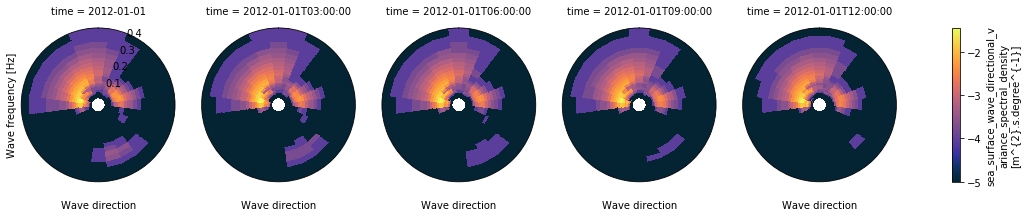

In [9]:
ds.efth.spec.plot(col="time")

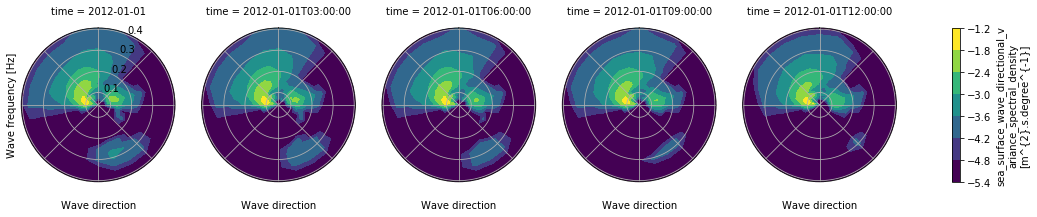

In [10]:
ds.efth.spec.plot.contourf(col="time")

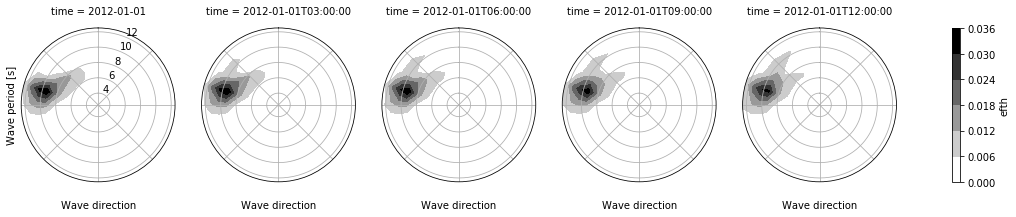

In [11]:
ds.efth.spec.split(fmin=0.08).spec.plot.contourf(col="time", as_log10=False, as_period=True, cmap="gray_r")

# SpecDset

## Wrapper around SpecArray stats

In [12]:
print(ds.spec)
hs1 = ds.efth.spec.hs()
hs2 = ds.spec.hs()

hs1.equals(hs2)

<SpecDataset>
Dimensions:  (dir: 24, freq: 25, time: 5)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-01-01T12:00:00
    site     float64 2.001e+03
  * freq     (freq) float32 0.04118 0.045298003 ... 0.36873826 0.40561208
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
Data variables:
    lon      float32 dask.array<SpecDataset>
    lat      float32 dask.array<SpecDataset>
    efth     (time, freq, dir) float32 dask.array<SpecDataset>
    dpt      (time) float32 dask.array<SpecDataset>
    wspd     (time) float32 dask.array<SpecDataset>
    wdir     (time) float32 dask.array<SpecDataset>


True

## Saving spectra to file

In [13]:
ds.spec.to_swan("specfile.swn")
ds.spec.to_netcdf("specfile.nc")

print(glob.glob("./specfile*"))

['./specfile.nc', './specfile.swn']


## Selecting

In [23]:
coords = read_ww3("/wave/socean/spec20120101T00_spec.nc")[["lon", "lat"]].load()
dset_lons = coords["lon"].values
dset_lats = coords["lat"].values

### Inverse distance weighting

In [24]:
idw = dset.spec.sel(
    lons=[150.1, 151.1, 152.1],
    lats=[-50, -50, -50],
    method="idw",
    tolerance=2.0,
    dset_lons=dset_lons,
    dset_lats=dset_lats,
)

### Nearest neighbour

In [25]:
nearest = dset.spec.sel(
    lons=[150.1, 151.1, 152.1],
    lats=[-50, -50, -50],
    method="nearest",
    tolerance=1.0,
    dset_lons=dset_lons,
    dset_lats=dset_lats,
)

### Bbox

In [26]:
bbox = dset.spec.sel(
    lons=[149, 153],
    lats=[-52, -48],
    method="bbox",
    tolerance=0.0,
    dset_lons=dset_lons,
    dset_lats=dset_lats,
)

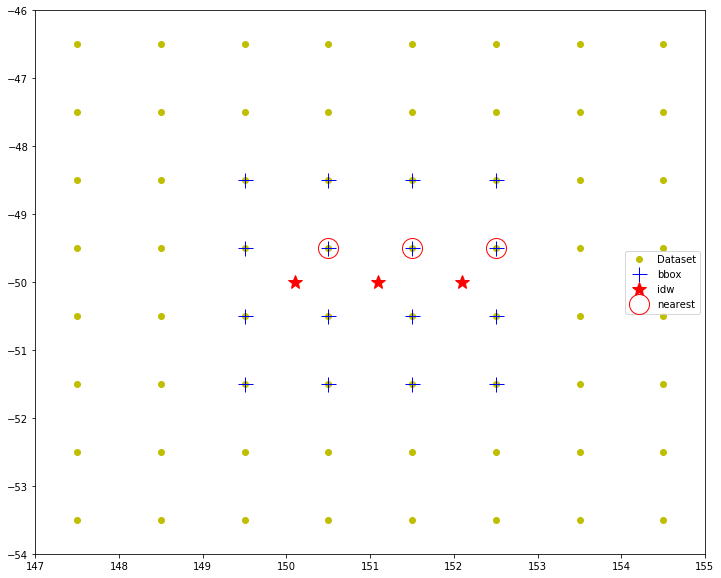

In [30]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.plot(dset_lons, dset_lats, 'oy', label="Dataset")
ax.plot(bbox.lon, bbox.lat, '+b', label="bbox", markersize=15)
ax.plot(idw.lon, idw.lat, '*r', label="idw", markersize=15)
ax.plot(nearest.lon, nearest.lat, 'or', markerfacecolor="none", label="nearest", markersize=20)
ax.set_xlim([147, 155])
ax.set_ylim([-54, -46])
ax.legend()

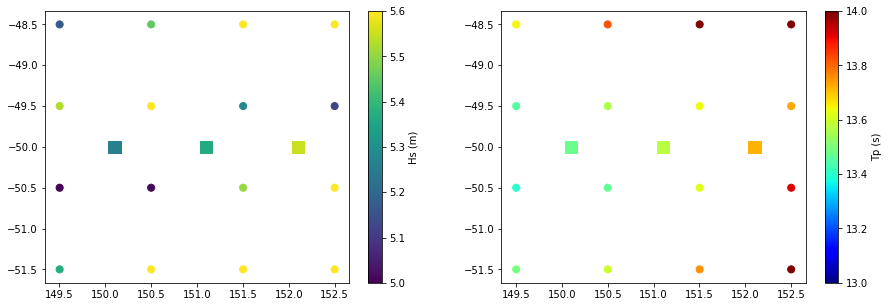

In [38]:
fig = plt.figure(figsize=(15, 5))

# Hs
ax = fig.add_subplot(121)
p = ax.scatter(bbox.lon, bbox.lat, 50, bbox.isel(time=0).spec.hs(), vmin=5, vmax=5.6)
p = ax.scatter(idw.lon, idw.lat, 150, idw.isel(time=0).spec.hs(), marker='s', vmin=5, vmax=5.6)
plt.colorbar(p, label="Hs (m)")

# Tp
ax = fig.add_subplot(122)
p = ax.scatter(bbox.lon, bbox.lat, 50, bbox.isel(time=0).spec.tp(), vmin=13, vmax=14, cmap="jet")
p = ax.scatter(idw.lon, idw.lat, 150, idw.isel(time=0).spec.tp(), marker='s', vmin=13, vmax=14, cmap="jet")
plt.colorbar(p, label="Tp (s)")